In [1]:
# Importing the required libraries
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_datareader as web
import datetime as dt 
# !pip install yfinance
import yfinance as yf
# !pip install sktime
import sktime
import pandas_datareader.data as pdr
# import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
# from tensorflow.keras.layers import Dense, Dropout, LSTM, LayerNormalization,Activation, BatchNormalization
# from tensorflow.keras.models import Sequential
from statsmodels.tsa.stattools import adfuller
# from tensorflow.keras import backend
from sklearn.metrics import mean_squared_error
# from pycaret.regression import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
crypto_currency = 'ETH'
against_currency ='USD'
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

In [3]:
yf.pdr_override()
data = pdr.get_data_yahoo("ETH-USD", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
final_data = pd.DataFrame()
# final_data["Close_Open"] = np.power(data['Close']-data['Open'],3)
# final_data["High_Low"] = data['High']/data['Low']
# final_data['t1'] = (np.power(data["High"]-data["Low"],3))
final_data['Close'] = data['Close']
store = final_data
# final_data = pd.DataFrame(difference((final_data)))
final_data.head()
# scaler = PowerTransformer(method="yeo-johnson", standardize=True)
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaler_close = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(final_data.iloc[:,:3])
# scaled_close = scaler_close.fit_transform(final_data.iloc[:,3:4])
# scaled_data = np.concatenate((scaled_data,scaled_close),axis=1)
# logged_data = np.log10(data['Close'])
# scaled_data, lambda_data = (boxcox(data['Close']))#difference(logged_data).to_numpy()
# new = difference((data['Close'],1)
# scaled_data = pd.Series(scaled_data)

,Close
Date,
2019-12-31,129.610855
2020-01-01,130.802002
2020-01-02,127.410179
2020-01-03,134.171707
2020-01-04,135.069366


In [5]:
# Preparing the Data
prediction_days = 200
future_days=0
# store = scaled_data
# scaled_data = np.array(difference(scaled_data))
x_train, y_train = [], []
scaled_data=np.array(final_data)
for x in range(prediction_days, len(scaled_data)-future_days-prediction_days-122):
    x_train.append(scaled_data[x-prediction_days:x])
    y_train.append(scaled_data[x+future_days:x+1,scaled_data.shape[1]-1])
x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))
# range(prediction_days, len(scaled_data))x_train
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])
y_train = y_train.flatten()

In [6]:
x_train.shape

(453, 200)

In [7]:
import xgboost as xgb

In [8]:
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1)

In [9]:
model.fit(x_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
scaled_data.shape

(975, 1)

In [203]:

y_pred = []
y_ptrain=[]
for i in range(0,122):
    x_train, y_train = [], []
    scaled_data=np.array(final_data)
    for x in range(prediction_days, len(scaled_data)-future_days-122-122):
        x_train.append(scaled_data[x-prediction_days:x])
        y_train.append(scaled_data[x+future_days+i:x+1+i,scaled_data.shape[1]-1])
    x_train, y_train = np.array(x_train), np.array(y_train)
    # x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    # y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))
    # range(prediction_days, len(scaled_data))x_train
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])
    y_train = y_train.flatten()
    
    model = xgb.XGBRegressor(booster='gbtree',objective='reg:squarederror',n_estimators=20, learning_rate=0.04,n_jobs=-1,max_depth=12,tree_method='auto',num_parallel_tree=10,colsample_bytree=0.3)
    model.fit(x_train, y_train, verbose=True)
    x_test = scaled_data[-200-122:-122]
    x_test = x_test.reshape(1,x_test.shape[0])
    y_pred = y_pred + [model.predict(x_test)]
    y_ptrain = y_ptrain + [model.predict(x_train)]


Text(0.5, 1.0, 'ACtual vs Predicted Closing Prices ETH (XGBoost)')

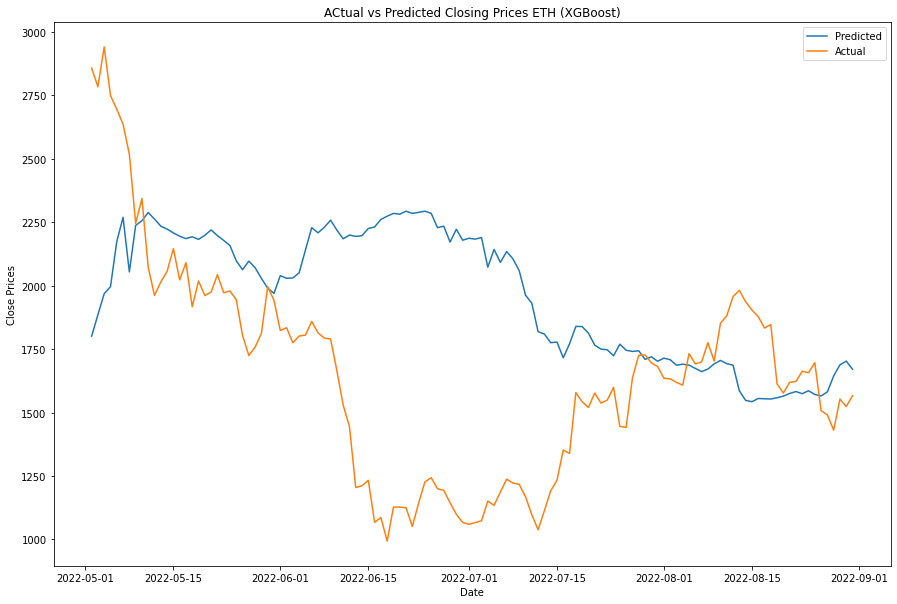

In [211]:
fig,axs = plt.subplots(1,1,figsize=(15,10))
axs.plot(final_data.index[-122:],y_pred)
axs.plot(final_data['Close'][-122:])
plt.legend(['Predicted','Actual'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('ACtual vs Predicted Closing Prices ETH (XGBoost)')

In [205]:
y_ptrain = np.array(y_ptrain)
y_ptrain

array([[ 138.72667,  138.72667,  138.72667, ..., 2273.0125 , 2270.656  ,
        2216.2886 ],
       [ 143.48405,  143.48405,  143.48405, ..., 2247.9097 , 2238.095  ,
        2208.553  ],
       [ 147.38103,  147.38103,  151.71095, ..., 2235.4082 , 2235.4082 ,
        2217.6233 ],
       ...,
       [ 280.34543,  280.34543,  280.34543, ..., 1690.8158 , 1705.7383 ,
        1691.1211 ],
       [ 284.84842,  284.84842,  288.10922, ..., 1677.0386 , 1662.4318 ,
        1635.5745 ],
       [ 298.75153,  298.75153,  298.75153, ..., 1659.408  , 1612.133  ,
        1603.6642 ]], dtype=float32)

In [206]:
y_ptrain[:,0].shape

(122,)

Text(0.5, 1.0, 'Predicted vs Actual Close Prices (XGBoost)')

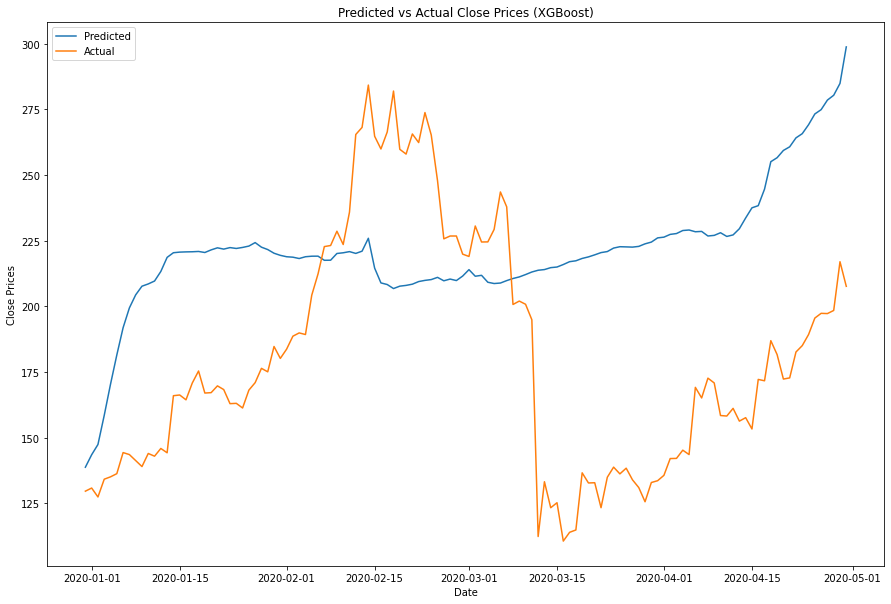

In [207]:
fig,axs = plt.subplots(1,1,figsize=(15,10))
axs.plot(final_data.index[:122],y_ptrain[:,0])
axs.plot(final_data['Close'][:122])
plt.legend(['Predicted','Actual'])
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('Predicted vs Actual Close Prices (XGBoost)')

In [15]:
def rmse(y_true, y_pred):
	return np.sqrt(np.mean(np.square(y_pred - y_true)))
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [209]:
rmse(final_data['Close'][-122:].values,y_pred[:])

580.4827395656266

In [210]:
mean_absolute_percentage_error(final_data['Close'][-122:].values,y_pred[:])

33.71615445508873

In [10]:
from sklearn.svm import SVR

In [11]:

y_pred = []
for i in range(0,122):
    x_train, y_train = [], []
    scaled_data=np.array(final_data)
    for x in range(prediction_days, len(scaled_data)-future_days-122-122):
        x_train.append(scaled_data[x-prediction_days:x])
        y_train.append(scaled_data[x+future_days+i:x+1+i,scaled_data.shape[1]-1])
    x_train, y_train = np.array(x_train), np.array(y_train)
    # x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    # y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))
    # range(prediction_days, len(scaled_data))x_train
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])
    y_train = y_train.flatten()
    
    model = SVR(gamma=10,C=0.1,kernel='rbf')#.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1)
    model.fit(x_train, y_train)
    x_test = scaled_data[-prediction_days-122:-122]
    x_test = x_test.reshape(1,x_test.shape[0])
    y_pred = y_pred + [model.predict(x_test)]


Text(0.5, 1.0, 'Actual vs Predicted Closing Prices ETH (SVR)')

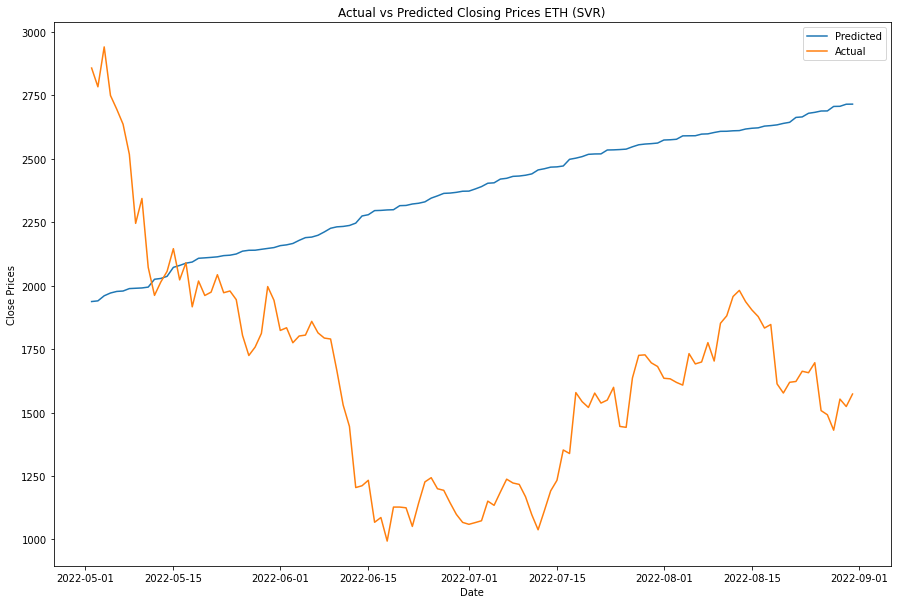

In [12]:
fig,axs = plt.subplots(1,1,figsize=(15,10))
axs.plot(final_data.index[-122:],y_pred)
axs.plot(final_data['Close'][-122:])
plt.legend(['Predicted','Actual'])
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('Actual vs Predicted Closing Prices ETH (SVR)')

In [16]:
rmse(final_data['Close'][-122:].values,y_pred[:])

858.9280637046953

In [17]:
mean_absolute_percentage_error(final_data['Close'][-122:].values,y_pred[:])

54.333452248134364